10


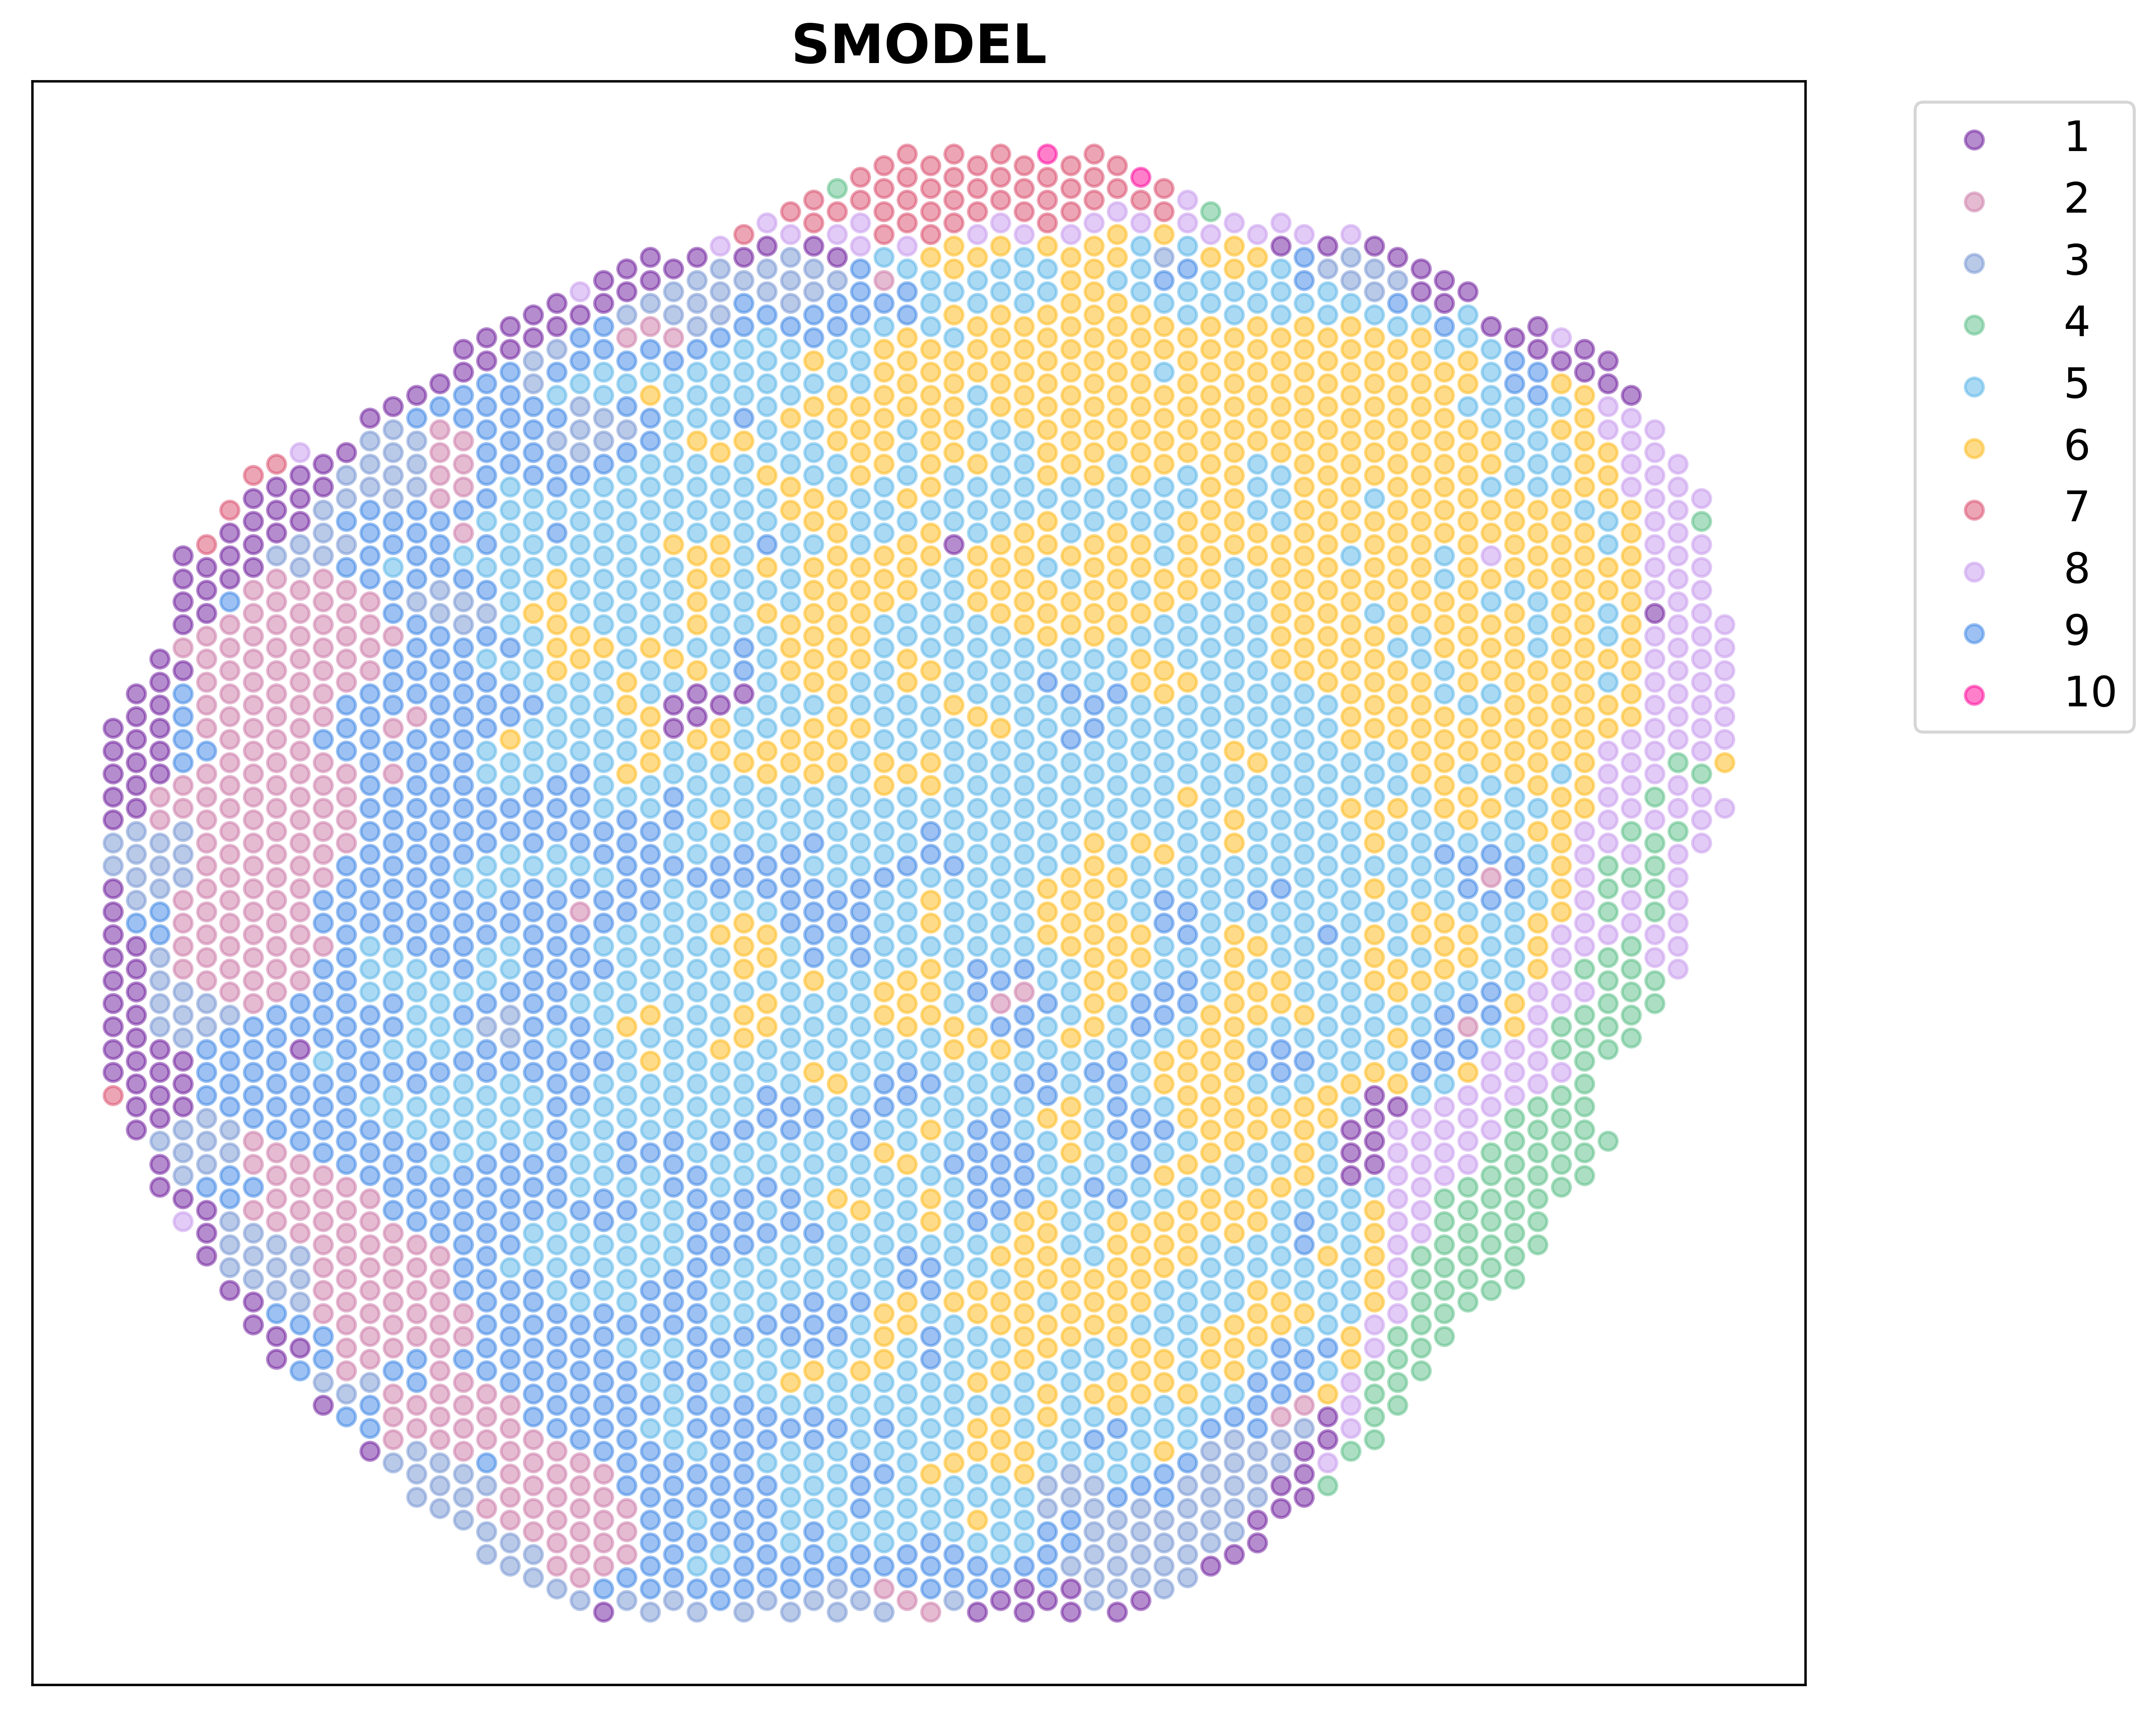

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")


adata_rna = sc.read_h5ad('./adata_RNA.h5ad')
dfa = pd.read_csv('./A1_SMODEL_label.csv', header=None)

column_index = 0
df = dfa.iloc[:, column_index].values.flatten()
print(len(np.unique(df)))

data = adata_rna.obsm['spatial']


plot_colors = {
    "1": "#6D1A9C", "2": "#CC79A7", "3": "#7495D3", "4": "#59BE86", "5": "#56B4E9", "6": "#FEB915", 
    "7": "#DB4C6C", "8": "#C798EE", "9": "#3A84E6", "10": "#FF0099FF", "11": "#CCFF00FF",
    "12": "#268785", "13": "#FF9900FF", "14": "#33FF00FF", "15": "#AF5F3C", "16": "#DAB370", 
    "17": "#554236", "18": "#787878", "19": "#877F6C"
}

# 确保颜色列表足够长
num_unique_labels = len(np.unique(df))
if num_unique_labels > len(plot_colors):
    raise ValueError("需要更多的颜色来区分所有标签")



# 绘制图像
fig, ax = plt.subplots(figsize=(10, 8), dpi=600)
unique_labels = np.unique(df)
for i, label in enumerate(unique_labels):
    ax.scatter(data[df == label, 0], data[df == label, 1], 
               color=plot_colors[str(i + 1)], label=f' {label}', alpha=0.5)

ax.set_title('SMODEL', fontsize=18, fontweight='bold')
ax.grid(False)  # 去掉背景网格
ax.set_xticks([])  # 隐藏x轴刻度
ax.set_yticks([])  # 隐藏y轴刻度
ax.set_facecolor('white')  # 设置背景颜色为白色

# 单独显示图例
legend = ax.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, framealpha=0.8)

plt.tight_layout()
plt.savefig('Visualization_result.pdf', dpi=600, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()
